In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Exploration and Data cleaning

In [2]:
data = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Outlier detection

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

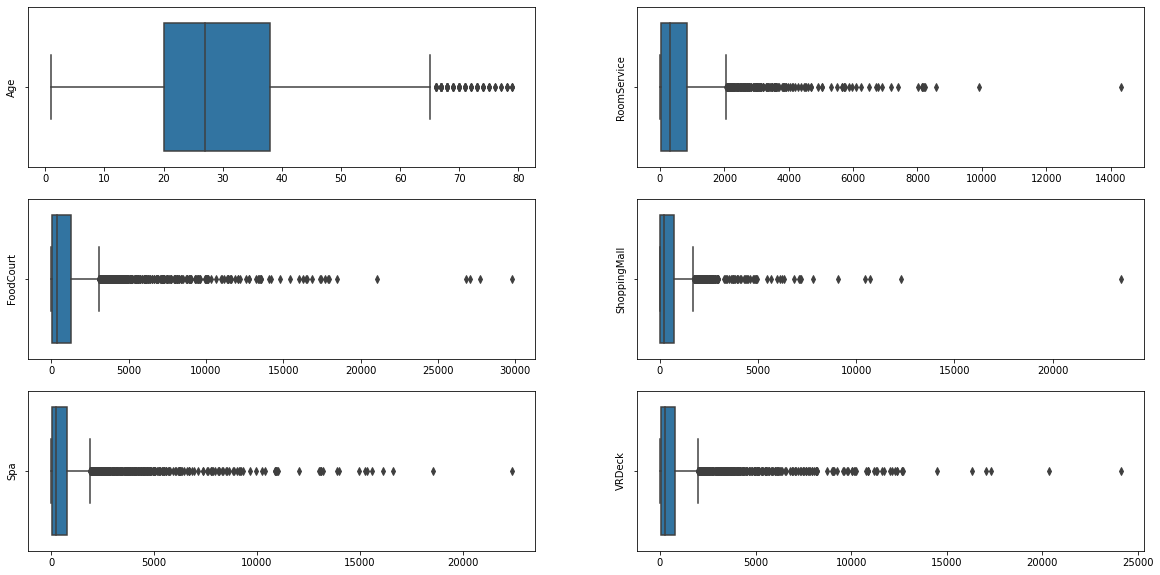

In [5]:
fig = plt.figure(figsize = (20, 10))
cont = 1
for i in range(len(data.dtypes)):
    if data.dtypes[i] == 'float64':
        p = fig.add_subplot(3, 2, cont)
        #We plot only !=0 values to see true outliers
        sns.boxplot(data[data[data.columns[i]] != 0][data.columns[i]])
        p.set_ylabel(data.columns[i])
        p.set_xlabel('')
        cont+=1

In [6]:
#Excluding what I consider true outliers
data = data[(data['RoomService'] < 14000) | (pd.isna(data['RoomService']))]
data = data[(data['ShoppingMall'] < 20000)| (pd.isna(data['ShoppingMall']))]
data = data[(data['Spa'] < 20000)| (pd.isna(data['Spa']))]
data = data[(data['VRDeck'] < 20000)| (pd.isna(data['VRDeck']))]
#data
data.shape

(8688, 14)

In [7]:
data = data.set_index('PassengerId')
test = test.set_index('PassengerId')
data['Transported'] = data['Transported'].map({True: 1, False: 0})                
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8509.000000,8507.000000,8505.000000,8480.000000,8506.000000,8500.000000,8688.000000
mean,28.821366,223.097332,455.763433,171.035731,308.535269,299.800118,0.503798
std,14.483233,649.135976,1604.345238,549.297028,1111.425817,1095.155945,0.500014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,46.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,9920.000000,29813.000000,12253.000000,18572.000000,17306.000000,1.000000


In [8]:
# df with all data except name (ASSUMIING name has no impact on the output)
df =  data.drop(['Name'] , axis=1)
# creating new columns from PassengerId and Cabin columns
# new column group
df['Group'] = df.index.str[:4]
df['Group'] = df.Group.astype(int)
# new column number in group
df['Number'] = df.index.str[-2:]
df['Number'] = df.Number.astype(int)
# new column Deck
df['Deck'] = df.Cabin.str[0]
# new column NumCabin
df['NumCabin'] = df.Cabin.str[2:-2]
# new column Side
df['Side'] = df.Cabin.str[-1]
df = df.drop('Cabin', axis = 1)

# SAME CHANGES FOR TEST
# df with all data except name (ASSUMIING name has no impact on the output)
test =  test.drop(['Name'] , axis=1)
# creating new columns from PassengerId and Cabin columns
# new column group
test['Group'] = test.index.str[:4]
test['Group'] = test.Group.astype(int)
# new column number in group
test['Number'] = test.index.str[-2:]
test['Number'] = test.Number.astype(int)
# new column Deck
test['Deck'] = test.Cabin.str[0]
# new column NumCabin
test['NumCabin'] = test.Cabin.str[2:-2]
# new column Side
test['Side'] = test.Cabin.str[-1]
test = test.drop('Cabin', axis = 1)


In [9]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             182
VRDeck          188
Transported       0
Group             0
Number            0
Deck            198
NumCabin        198
Side            198
dtype: int64

In [10]:
def fillnull(df):
    notest = 'Transported' in df.columns
    for i in range(len(df.columns)):
        if(df.dtypes[i] == float):
            if notest:
                df[df.columns[i]] = df[df.columns[i]].fillna(df.groupby(['Group','Transported'])[df.columns[i]].transform('mean'))
            df[df.columns[i]] = df[df.columns[i]].fillna(df.groupby(['Group'])[df.columns[i]].transform('mean'))
            if notest:
                df[df.columns[i]] = df[df.columns[i]].fillna(df.groupby(['Transported'])[df.columns[i]].transform('mean'))
            df[df.columns[i]].fillna(df[df.columns[i]].mean(), inplace=True)
        else:
            #I need to figure out how to replace null values with the mode of their groups in cathegorical columns as i do with
            #the mean in numeric columns
            if notest:
                df.dropna(inplace = True)
            else:
                df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mode()[0])
    print(df.isnull().sum())

fillnull(df)
fillnull(test)

df['CryoSleep'] = df['CryoSleep'] ==True
df['VIP'] = df['VIP'] ==True

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Group           0
Number          0
Deck            0
NumCabin        0
Side            0
dtype: int64
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
Number          0
Deck            0
NumCabin        0
Side            0
dtype: int64


In [11]:
df['NumCabin'] = df.NumCabin.astype(int)
test['NumCabin'] = test.NumCabin.astype(int)

In [12]:
df.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Number,NumCabin
CryoSleep,1.000000,-0.081616,-0.081991,-0.255296,-0.210736,-0.228295,-0.206760,-0.202074,0.461527,-0.001321,0.067032,-0.034324
Age,-0.081616,1.000000,0.097015,0.071015,0.132863,0.041587,0.119488,0.105814,-0.080058,-0.004654,-0.132945,-0.136444
VIP,-0.081991,0.097015,1.000000,0.027327,0.137363,0.014792,0.068167,0.131470,-0.039366,0.016436,-0.006199,-0.107136
RoomService,-0.255296,0.071015,0.027327,1.000000,-0.014246,0.061803,0.011314,-0.021277,-0.247884,-0.004661,-0.026164,-0.009587
FoodCourt,-0.210736,0.132863,0.137363,-0.014246,1.000000,-0.012529,0.204956,0.216543,0.055874,-0.007658,0.026422,-0.186870
ShoppingMall,-0.228295,0.041587,0.014792,0.061803,-0.012529,1.000000,0.022670,-0.000840,0.010710,0.020402,-0.040198,0.005841
Spa,-0.206760,0.119488,0.068167,0.011314,0.204956,0.022670,1.000000,0.158502,-0.223574,-0.012555,0.021460,-0.138462
VRDeck,-0.202074,0.105814,0.131470,-0.021277,0.216543,-0.000840,0.158502,1.000000,-0.210132,0.007302,0.007474,-0.143903
Transported,0.461527,-0.080058,-0.039366,-0.247884,0.055874,0.010710,-0.223574,-0.210132,1.000000,0.025938,0.074286,-0.044888
Group,-0.001321,-0.004654,0.016436,-0.004661,-0.007658,0.020402,-0.012555,0.007302,0.025938,1.000000,0.006562,0.677043


Transported very positively correlated with Cryosleep and negatively correlated RoomService, Spa and VRDeck.

In [13]:
target = df['Transported']
df =  df.drop(['Transported'] , axis=1)

In [14]:
df.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Group             int64
Number            int64
Deck             object
NumCabin          int64
Side             object
dtype: object

In [15]:
features_num = []
features_cat = []

for i in range(len(df.dtypes)):
    if df.dtypes[i] == 'object':
        features_cat.append(df.columns[i])
    else:
        features_num.append(df.columns[i])
        
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

In [16]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(df, target, stratify=target, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

model =  keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='selu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])



Epoch 1/200
20/20 [==============================] - 2s 30ms/step - loss: 0.6010 - binary_accuracy: 0.7286 - val_loss: 0.4823 - val_binary_accuracy: 0.8090
Epoch 2/200
20/20 [==============================] - 0s 18ms/step - loss: 0.5158 - binary_accuracy: 0.7576 - val_loss: 0.4722 - val_binary_accuracy: 0.7989
Epoch 3/200
20/20 [==============================] - 0s 18ms/step - loss: 0.4832 - binary_accuracy: 0.7718 - val_loss: 0.4444 - val_binary_accuracy: 0.7948
Epoch 4/200
20/20 [==============================] - 0s 18ms/step - loss: 0.4629 - binary_accuracy: 0.7781 - val_loss: 0.4344 - val_binary_accuracy: 0.7918
Epoch 5/200
20/20 [==============================] - 0s 17ms/step - loss: 0.4599 - binary_accuracy: 0.7795 - val_loss: 0.4305 - val_binary_accuracy: 0.7960
Epoch 6/200
20/20 [==============================] - 0s 17ms/step - loss: 0.4424 - binary_accuracy: 0.7852 - val_loss: 0.4208 - val_binary_accuracy: 0.7930
Epoch 7/200
20/20 [==============================] - 0s 17ms/ste

<AxesSubplot:title={'center':'Accuracy'}>

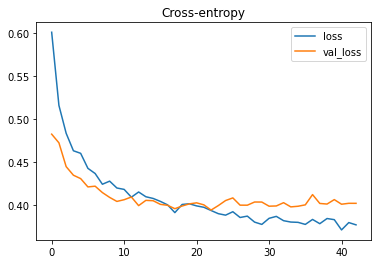

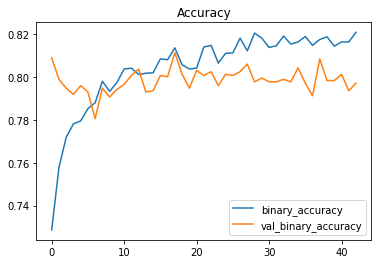

In [18]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=200,
   
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [19]:
test_trans = preprocessor.fit_transform(test)
y_pred = model.predict(test_trans)

In [20]:
f = open ('/kaggle/working/submission.csv','w')
f.write('PassengerId,Transported\n')
for i in range(len(y_pred)):
    f.write(test.index[i])
    f.write(',')
    f.write(str(y_pred[i][0] > 0.5))
    f.write('\n')
f.close()